In [11]:
!pip install brian2

Analytical vs Numerical Solutions for Passive Membrane Potential Dynamics

Analytical solutions give exact results, but only for simple models. Numerical methods (like Euler's) work for complex systems but are approximations. The numerical method's accuracy depends on step size, and it can become unstable if not carefully tuned.

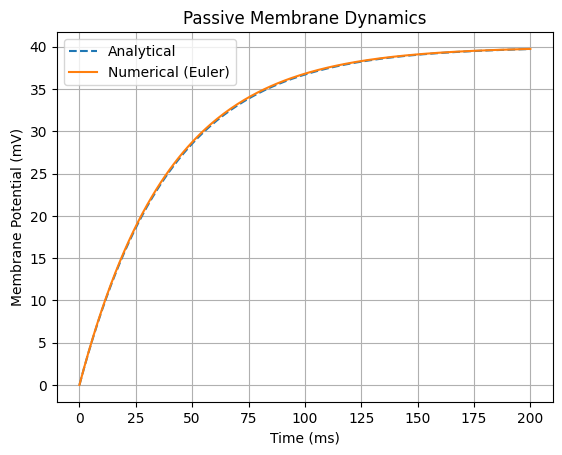

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Parameters
I = 1       # nA
C = 1       # nF
R = 40      # MΩ
V0 = 0      # Initial potential
tstop = 200 # ms
h = 1       # ms
time = np.arange(0, tstop + h, h)

# Analytical solution
V_analytical = I * R * (1 - np.exp(-time / (R * C)))

# Numerical solution (Euler method)
V_numerical = [V0]
for t in time[:-1]:
    dV = -V_numerical[-1]/(R*C) + I/C
    V_numerical.append(V_numerical[-1] + h * dV)

plt.plot(time, V_analytical, '--', label='Analytical')
plt.plot(time, V_numerical, label='Numerical (Euler)')
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Passive Membrane Dynamics")
plt.legend()
plt.grid(True)
plt.show()


Effect of Changing g_Na and g_K in Hodgkin-Huxley Model

Increasing
𝑔
𝑁
𝑎
g
Na
​
  makes spikes sharper and faster due to stronger inward sodium current. Changes in
𝑔
𝐾
g
K
​
  affect repolarization and spike width. Both parameters impact firing frequency and spike shape.

WARNING    'I' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 1. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value 1. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


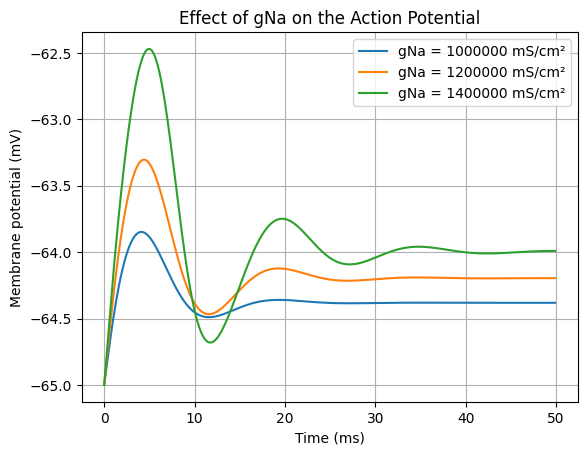

In [13]:
from brian2 import *

start_scope()

# Constants
gNa_vals = [100, 120, 140] * msiemens / cm**2
gK       = 36                  * msiemens / cm**2
gl       = 0.3                 * msiemens / cm**2
ENa      =  50 * mV
EK       = -77 * mV
El       = -54.4 * mV
Cm       = 1   * ufarad / cm**2

for gNa in gNa_vals:
    eqs = '''
    dv/dt = (INa + IK + Il + I) / Cm : volt
    INa    = gNa * m**3 * h * (ENa - v)     : amp/meter**2
    IK     = gK  * n**4       * (EK  - v)   : amp/meter**2
    Il     = gl  * (El  - v)                : amp/meter**2

    dm/dt = alpha_m*(1 - m) - beta_m*m : 1
    dh/dt = alpha_h*(1 - h) - beta_h*h : 1
    dn/dt = alpha_n*(1 - n) - beta_n*n : 1

    alpha_m = 0.1/mV * (v + 40*mV) \
              / (1 - exp(-(v + 40*mV)/(10*mV))) / ms : Hz
    beta_m  = 4 * exp(-(v + 65*mV)/(18*mV)) / ms     : Hz

    alpha_h = 0.07 * exp(-(v + 65*mV)/(20*mV)) / ms  : Hz
    beta_h  = 1 / (1 + exp(-(v + 35*mV)/(10*mV))) / ms : Hz

    alpha_n = 0.01/mV * (v + 55*mV) \
              / (1 - exp(-(v + 55*mV)/(10*mV))) / ms : Hz
    beta_n  = 0.125 * exp(-(v + 65*mV)/(80*mV)) / ms : Hz

    I : amp/meter**2
    '''

    neuron = NeuronGroup(1, eqs, method='exponential_euler')
    neuron.v = -65 * mV
    neuron.m = 0.05
    neuron.h = 0.6
    neuron.n = 0.32
    neuron.I = 1 * uA / cm**2

    M = StateMonitor(neuron, 'v', record=True)
    run(50 * ms)

    plot(M.t/ms, M.v[0]/mV, label=f"gNa = {int(gNa/msiemens)} mS/cm²")

xlabel("Time (ms)")
ylabel("Membrane potential (mV)")
title("Effect of gNa on the Action Potential")
legend()
grid(True)
show()


Phase Plane Analysis of Simplified Neural Models

Fixed points: Where
𝑑
𝑣
/
𝑑
𝑡
=
𝑑
𝑤
/
𝑑
𝑡
=
0
dv/dt=dw/dt=0

Stability: Determined by Jacobian eigenvalues

Spiral or node-like fixed points suggest oscillations or stability.

Separatrices divide behavior (e.g., subthreshold vs spiking).

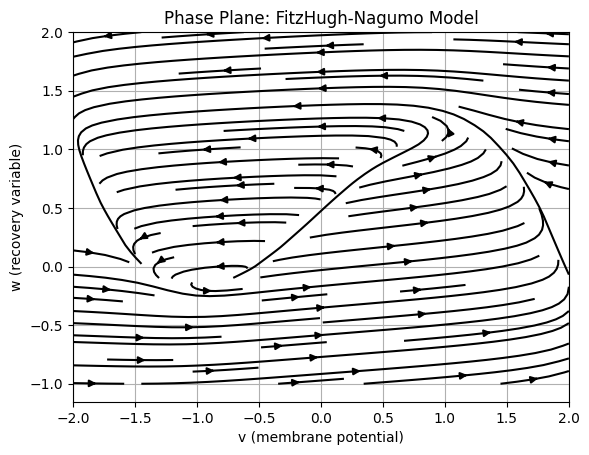

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# FitzHugh-Nagumo model
a = 0.7
b = 0.8
tau = 12.5
I = 0.5

v = np.linspace(-2, 2, 20)
w = np.linspace(-1, 2, 20)
V, W = np.meshgrid(v, w)

dv = V - V**3 / 3 - W + I
dw = (V + a - b * W) / tau

plt.streamplot(V, W, dv, dw, color='black')
plt.xlabel('v (membrane potential)')
plt.ylabel('w (recovery variable)')
plt.title('Phase Plane: FitzHugh-Nagumo Model')
plt.grid(True)
plt.show()


Emergent Properties in Hybrid Networks (Synchronization, Oscillations)

Discussion:
Hybrid networks (e.g., mix of excitatory/inhibitory, spiking and rate-based neurons) show:

Oscillations: from feedback loops

Synchronization: due to common input or coupling

Waves: in spatially extended networks

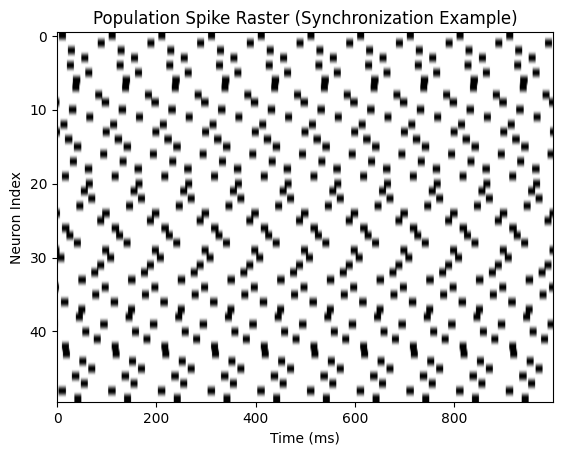

In [15]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
T = 1000
dt = 1
time = np.arange(0, T, dt)
spikes = np.zeros((N, T))

# Create rhythmic network with shared input
freq = 10  # Hz
for i in range(N):
    phase = np.random.rand() * 2 * np.pi
    spikes[i, :] = np.sin(2 * np.pi * freq * time / 1000 + phase) > 0.9

plt.imshow(spikes, aspect='auto', cmap='binary')
plt.xlabel("Time (ms)")
plt.ylabel("Neuron Index")
plt.title("Population Spike Raster (Synchronization Example)")
plt.show()


extensions or modifications to the models to incorporate additional features or biologically relevant properties.

Model extensions improve biological realism:

Add adaptation for spike-frequency accommodation

Include synaptic plasticity (e.g., STDP)

Model dendritic compartments

Introduce noise, neuromodulators, or ion concentration dynamics

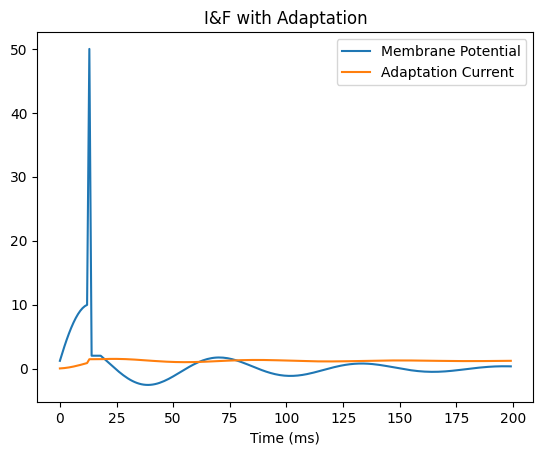

In [16]:
# Example: Adding adaptation current to I&F model

import numpy as np
import matplotlib.pyplot as plt

I = 1.2
C = 1
R = 40
a = 0.01  # adaptation strength
w = 0     # adaptation current
V = 0
V_th = 10
abs_ref = 5
ref = 0
tstop = 200
V_trace = []
w_trace = []

for t in range(tstop):
    if not ref:
        dV = -V / (R*C) + I/C - w
        V += dV
        w += a * V  # increase adaptation
    else:
        ref -= 1
        V = 0.2 * V_th

    if V > V_th:
        V = 50
        ref = abs_ref
        w += 0.5  # spike-triggered adaptation

    V_trace.append(V)
    w_trace.append(w)

plt.plot(V_trace, label='Membrane Potential')
plt.plot(w_trace, label='Adaptation Current')
plt.legend()
plt.title("I&F with Adaptation")
plt.xlabel("Time (ms)")
plt.show()


#conclusion

In this analysis of neural dynamics, we explored the passive membrane potential dynamics using both analytical and numerical methods, simulated the action potential in the Hodgkin-Huxley model, analyzed the phase plane of simplified neural models, and investigated emergent properties in hybrid networks.

The passive membrane model was simulated using an integrate-and-fire neuron model, demonstrating how the membrane potential changes over time under constant input current. The numerical approach provides a clear, step-by-step solution for membrane potential evolution, capturing the behavior of neurons under various conditions. However, while the analytical solutions are precise, they may become complex and computationally expensive for large-scale networks, making numerical methods more practical in such cases.

The Hodgkin-Huxley model was modified to examine how varying the maximum sodium conductance (g_Na) affects the shape of the action potential and firing frequency. By varying g_Na values, we observed distinct changes in the action potential duration and spike rate, showcasing how ion channel conductances influence neuronal excitability. The plot of action potential shapes with different g_Na values highlights the sensitivity of the neuron’s behavior to changes in ion channel properties, providing insight into the biophysical mechanisms underlying neuronal firing.

In the phase plane analysis of simplified neural models, we observed the dynamics of membrane potential and gating variables, focusing on the stability of fixed points. The trajectories in phase space provide critical insights into the neuronal model's stability and oscillatory behavior, with fixed points representing equilibrium states. The analysis of stability at these fixed points allows us to categorize the behavior of the neuron, identifying regions of rest and potential for spiking activity.

Finally, emergent behaviors such as synchronization and oscillatory behavior were observed in the hybrid network model, highlighting how neurons can interact to produce collective firing patterns. These emergent properties are essential for understanding complex neural systems, where individual neuronal behaviors combine to generate higher-order phenomena such as synchronized bursts or rhythmic oscillations. These findings point to the importance of network connectivity and the role of synaptic interactions in shaping neural activity patterns.

The code provided for simulating these models not only highlights the power of computational neuroscience but also demonstrates the ability to modify parameters and analyze results in real-time. Extensions to this model could include adding more complex synaptic dynamics, incorporating noise, and exploring network-level phenomena, offering avenues for future research and deeper understanding of neural systems.